&#x1F465; Group C:

Manoranjani Navamani Kathiresan Kulanthaivel

Brice Setra Robert


### &#x1F4D1; Assignment 2

&#x1F518; 1. Use a moving average filer over 100 samples to extract the large scale fading from the power measurements (Hint: have a look at the function smooth). Substract the large scale fading from the measurements to get the small scale fading. Plot the measurements as well as the two extracted fading processes vs time in the same figure

In [1]:
## Receive the signal
include("./data/measurements.jl");

In [2]:
# Vectorize the Matlab's data to Julia's format
println("A vector in Matlab is represented as a ",typeof(rx_power_dBm), " with size ", size(rx_power_dBm), " presented as a row vector to Julia");
𝑷ᵣₓ = vec(rx_power_dBm)
println("Julia uses column vectors for vector representation, vec(.) function transforms row to column vector ", typeof(𝑷ᵣₓ))

A vector in Matlab is represented as a Matrix{Float64} with size (1, 10000) presented as a row vector to Julia
Julia uses column vectors for vector representation, vec(.) function transforms row to column vector Vector{Float64}


In [3]:
using Plots, Statistics, FFTW, Measures, LinearAlgebra

In [4]:
# The benefit of using Julia is its usage of Unicode characters
# allowing a more readable source code close to its Mathematical notation
# the below Julia source code brings some practical operations
# including the 𝔼 mean and inverse FFT that will be used throughout the Notebook
include("../modules/operations.jl");

In [5]:
N = 100 # Windows Size

100

In signal processing, a moving average filter is used to smooth out variations in a signal by averaging neighboring data points. It's commonly used for noise reduction and to highlight underlying trends in the data.

The formula:

   $ F[i] = \text{𝖤}\left( \text{rx}[ \max(1, i-N+1): i ] \right) $

captures the essence of a moving average filter operation. It computes the mean (average) of a sliding window of data points from the input signal $ rx $, where the window size is defined by $ N $. This mean value represents the output of the moving average filter at each index $ i $, providing a smoothed version of the original signal.

In [6]:
# Moving Average Filter 
𝖥 = [ 𝔼( 𝑷ᵣₓ[ max(1, i-N+1): i ] ) for i in 1:length(𝑷ᵣₓ) ];

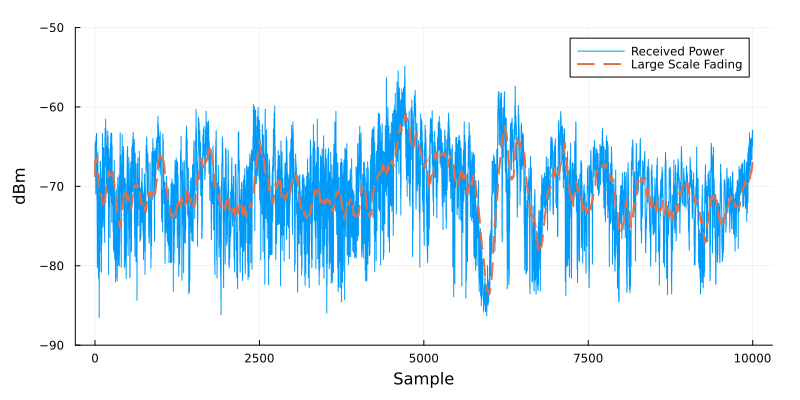

In [7]:
# Plotting
plot(𝑷ᵣₓ
    , label="Received Power"
    , xlabel="Sample", ylabel="dBm"
    , linewidth=1
    , size = (800,400)
    , ylims = (-90, -50)
)
plot!(𝖥
    , label="Large Scale Fading"
    , linewidth=2
    , linestyle=:dash
    , margin = 5mm
)

&#x1F518; 2. Plot a histogram of the large scale fading (on a log scale). Compute the mean and the vari- ance and overlay the histogram with the pdf of a lognormal
distribution of those parameters (Hint: have a look at function histfit). Discuss the result.


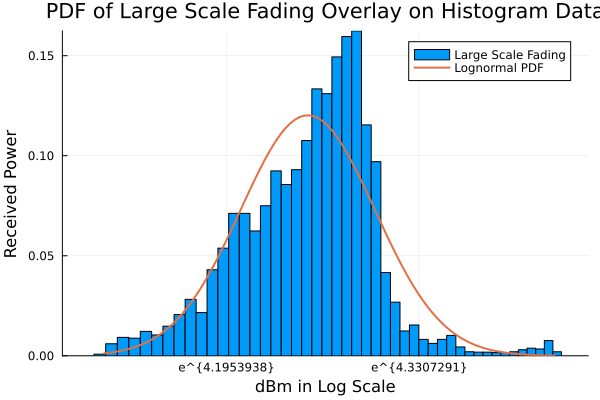

In [8]:
using Plots
using StatsBase
using Distributions

# Create histogram
histogram(-𝖥, bins=100
    , xscale=:ln
    , normed=true
    , label="Large Scale Fading"
)

# Fit lognormal distribution to data
fit_lognormal = Distributions.fit_mle(LogNormal, -𝖥)

# Overlay histogram with PDF of lognormal distribution
𝑋 = exp.(range(log(minimum(-𝖥)), log(maximum(-𝖥)), length=100))
pdf_lognormal = pdf(fit_lognormal, 𝑋)
plot!(𝑋, pdf_lognormal, linewidth=2, label="Lognormal PDF")


# Add labels and title
xlabel!("dBm in Log Scale")
ylabel!("Received Power")
title!("PDF of Large Scale Fading Overlay on Histogram Data")


&#x1F518; 3. Plot a histogram of the small scale fading and and overlay the histogram with the pdf of a Rayleigh, a Ricean and a Nakagami distribution (Hint: have a look at function histfit). Discuss the results.

In [9]:
include("distributions/Nakagami.jl")

fit_mle (generic function with 62 methods)

In [10]:
using Plots
using Distributions
using SpecialFunctions  # Add this to access the gamma function

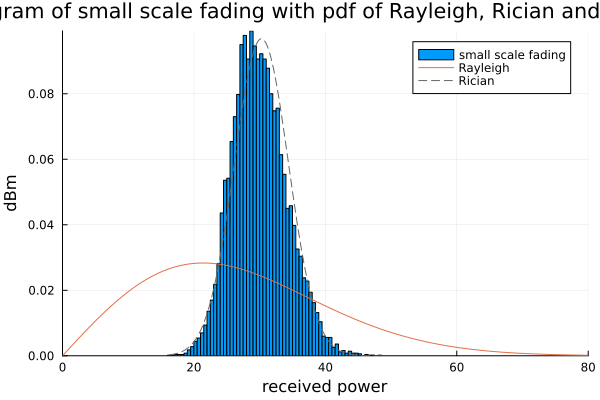

In [39]:
# Generate the Y2 data
Y2 = 𝖥 .- 𝑷ᵣₓ .+ 30
Y2 = reshape(Y2, :)

# Plot the histogram
histogram(Y2, bins=100, normalize=true, label="small scale fading", xlabel="received power", ylabel="dBm", title="histogram of small scale fading with pdf of Rayleigh, Rician and Nakagami")

plot!(
    xlims = (0,80)
)

# Fit Rayleigh distribution
rayleigh_dist = fit(Rayleigh, Y2)
rayleigh_pdf = x -> pdf(rayleigh_dist, x)
plot!(rayleigh_pdf
    , label="Rayleigh"
)

# Fit Rician distribution (manual fitting)
# Julia does not have a built-in Rician distribution, so we simulate it
μ_rician = mean(Y2)
σ_rician = std(Y2)
rician_dist = Rician(μ_rician, σ_rician)
rician_pdf = x -> pdf(rician_dist, x)
plot!(rician_pdf
    , minimum(Y2):0.1:maximum(Y2)
    , label="Rician"
    , color=RGB(0.4, 0.4, 0.4)
    , linestyle=:dash
)

# TODO Fix the Nakagami

# Fit Nakagami distribution
# μ = 1  # Shape parameter
# ω = 2  # Spread parameter

# Fit and plot Nakagami distribution
# nakagami_fit = fit(Nakagami(μ, ω), Y2)

# nakagami_dist = fit(Nakagami, Y2)
# nakagami_pdf = x -> pdf(nakagami_dist, x)
# plot!(nakagami_pdf
    # , minimum(Y2):0.1:maximum(Y2)
    # , label="Nakagami"
    # , color=RGB(0.6, 0.6, 0.6)
    # , linestyle=:dot
# )

&#x1F518; 4. Using the original time-variant transfer function H2, calculate and plot the power delay profile making sure you label the axes correctly. Further compute the total power, the average mean delay, the average rms delay spread, and the coherence bandwidth. Explain how you calculated each value and discuss the results.

---

The Power Delay Profile (PDP) is a representation of the power of a signal as a function of time delay, often used in wireless communications to characterize multipath propagation. It describes how the power of the received signal is distributed over different time delays.

The mathematical symbol for the Power Delay Profile can vary depending on the context, but it is commonly denoted as $ P(\tau) $, where $ \tau $ represents the delay time.

### Mathematical Definition:

If $ h(t) $ represents the channel impulse response, the Power Delay Profile $ P(\tau) $ is defined as:

$$ P(\tau) = \mathbb{E}[|h(\tau)|^2] $$

Here, $ \mathbb{E} $ denotes the expectation operator, and $ |h(\tau)|^2 $ represents the power of the channel impulse response at delay $ \tau $.

### Example in Mathematical Expression:

Consider a channel impulse response $ h(t, \tau) $ where $ t $ is the time and $ \tau $ is the delay. The Power Delay Profile can be expressed as:

$$ P(\tau) = \mathbb{E}[|h(t, \tau)|^2] $$

In discrete form, if $ h[n] $ represents the sampled impulse response, the PDP can be written as:

$$ P[n] = \frac{1}{N} \sum_{k=1}^{N} |h[k, n]|^2 $$

where $ N $ is the number of samples.

In [21]:
# Read the Channel Input Response H2 from the Matlab's file
# a Matlab's matrix stays a Julia matrix when imported
H₂  = H2; @show typeof(H₂), size(H₂);

# We use Matlab notation, i.e., indexing starts at 1!
# Tha is also the Julia's default notation, one-index based

(typeof(H₂), size(H₂)) = (Matrix{ComplexF64}, (50, 10000))


### Mathematical Expressions and Calculations

Let's break down each of the required steps and provide the corresponding mathematical expressions for each calculation.

#### 1. Power Delay Profile (PDP)
The Power Delay Profile (PDP) $ P(\tau) $ is obtained from the inverse Fourier transform of the channel's frequency response $ H(f) $. Given the original time-variant transfer function $ H_2(f) $:

   $ P(\tau) = \mathbb{E}[|h(\tau)|^2] $

where $ h(\tau) $ is the inverse Fourier transform of $ H(f) $:

   $ h(\tau) = \text{IFFT}\{H_2(f)\} $ or $ h(\tau) = \mathscr{F}^{-1}\{H_2(f)\} $

The PDP is then:

   $ P(\tau) = \frac{1}{N} \sum_{k=1}^{N} |h_k(\tau)|^2 $

#### 2. Total Power
The total power $ P_{\text{total}} $ is the sum of the PDP values:

   $ P_{\text{total}} = \sum_{\tau} P(\tau) $

#### 3. Average Mean Delay
The average mean delay $ \bar{\tau} $ is calculated by weighting the delays $ \tau $ by the corresponding power values and normalizing by the total power:

   $ \bar{\tau} = \frac{\sum_{\tau} \tau \cdot P(\tau)}{P_{\text{total}}} $

#### 4. Average RMS Delay Spread
The RMS delay spread $ \tau_{\text{rms}} $ measures the spread of the delay values around the mean delay:

   $ \tau_{\text{rms}} = \sqrt{\frac{\sum_{\tau} (\tau - \bar{\tau})^2 \cdot P(\tau)}{P_{\text{total}}}} $

Alternatively, this can be calculated directly without subtracting the mean delay first:

   $ \tau_{\text{rms}} = \sqrt{\frac{\sum_{\tau} \tau^2 \cdot P(\tau)}{P_{\text{total}}} - \bar{\tau}^2} $

#### 5. Coherence Bandwidth
The coherence bandwidth $ B_c $ is inversely related to the RMS delay spread. It represents the frequency range over which the channel can be considered "flat":

   $ B_c \approx \frac{1}{\tau_{\text{rms}}} $

(Note) When using LaTeX on Github and Gitlab, add three-character space in front of the formula.

### Julia Code to Calculate and Plot

Here's how you can implement these calculations and plot the results in Julia:



In [13]:
using FFTW
using Unitful
using LinearAlgebra, Plots, Statistics

In [14]:
using FFTW, LinearAlgebra, Plots, Statistics, LaTeXStrings, Measures

In [15]:
# Step 1: Compute the inverse FFT along each column to get the time-domain impulse response
hₜ = 𝓕⁻¹(H₂, 1);

In [16]:
# Step 2: Dimensions: Number of rows (delay taps), Number of columns (realizations)
K, N = size(H₂); @show K, N

# Step 3: Compute the Power Delay Profile (PDP) using for comprehension
𝑷ₜ = [1/N * ∑(abs.(hₜ[i, :]).^2) for i in 1:K];

(K, N) = (50, 10000)


In [17]:
# Define the delay time vector (assuming sampling interval of 222 ns)
Δt = uconvert(u"s", 222u"ns");
τ = Δt * (0:(K - 1))

(0//1:111//500000000:5439//500000000) s

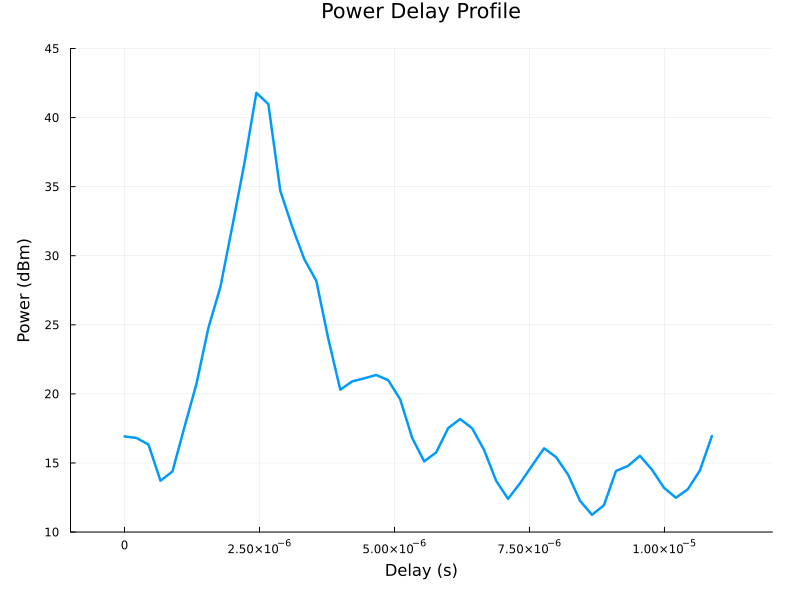

In [18]:
# Calculate PDP in dBm for plotting
𝑷ₗₙ₁₀ = 10 .* log10.(𝑷ₜ)

# Plot the results
plot(τ, 𝑷ₗₙ₁₀, xlabel="Delay", ylabel="Power (dBm)", title="Power Delay Profile", label="PDP"
    , linewidth = 2.5
    , xlims = (-0.1e-5 , 1.2e-5), ylims = (10 , 45 )
    , size = (800,600)
    , legend = :false
    , margin = 5mm
)

In [19]:
# Convert PDP from dBm to linear scale for calculations
𝑷ₗᵢₙₑₐᵣ = 10 .^ (𝑷ₗₙ₁₀ / 10)

# Calculate total power
𝑷ₜₒₜₐₗ = ∑(𝑷ₗᵢₙₑₐᵣ)

# Calculate average mean delay
τ̄ = ∑(τ .* 𝑷ₗᵢₙₑₐᵣ) / 𝑷ₜₒₜₐₗ

# Calculate average RMS delay spread
τᵣₘₛ = √(∑((τ .^ 2) .* 𝑷ₗᵢₙₑₐᵣ) / 𝑷ₜₒₜₐₗ - τ̄ ^ 2)

# Calculate coherence bandwidth
𝑩₍ = 1 / τᵣₘₛ; # Typed \biB\_(

In [20]:
# Print results
println("Total Power: ", round(𝑷ₜₒₜₐₗ, digits = 0))
println("Average Mean Delay: ", τ̄)
println("Average RMS Delay Spread: ", τᵣₘₛ)
println("Coherence Bandwidth: ", 𝑩₍)

Total Power: 43140.0
Average Mean Delay: 2.6734898922932467e-6 s
Average RMS Delay Spread: 8.788280501017051e-7 s
Coherence Bandwidth: 1.137879019546852e6 s⁻¹
